In [ ]:
!pip install opencv-python
!pip install pip --upgrade --user
!pip install visualkeras

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob
import visualkeras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory=pathlib.Path("/content/drive/MyDrive/brain_tumor/Training")

In [ ]:
data = []
for filename in os.listdir("."):
    if filename.endswith("jpg"):
        print(filename)
        data.append(filename)

gg.jpg


In [ ]:
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

398

In [ ]:
images_dict={
    "glioma":list(directory.glob('glioma_tumor/*.jpg')),
    "meningioma":list(directory.glob('meningioma_tumor/*.jpg')),
    "no":list(directory.glob('no_tumor/*.jpg')),
    "pituitary":list(directory.glob('pituitary_tumor/*.jpg'))
}

In [ ]:
images_dict

{'glioma': [PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (70).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (93).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (9).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (65).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (87).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (85).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (66).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (84).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (96).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (72).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (75).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training

In [ ]:
keys=["glioma","meningioma","no","pituitary"]

In [ ]:
resized,labels=[],[]
for name,images in images_dict.items():
    for image in images:
        #print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(name))
images_dict

{'glioma': [PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (70).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (93).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (9).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (65).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (87).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (85).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (66).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (84).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (96).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (72).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training/glioma_tumor/gg (75).jpg'),
  PosixPath('/content/drive/MyDrive/brain_tumor/Training

In [ ]:
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=1)

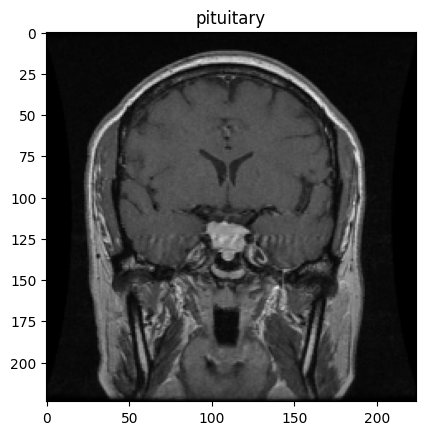

In [ ]:
print_image(x_train[15],y_train[15])

In [ ]:
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(298, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(298,)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
myCNN7_1=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(4,activation="softmax")
])
myCNN7_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=myCNN7_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
 6/10 [=================>............] - ETA: 0s - loss: 10.2942 - accuracy: 0.1927

10/10 [==============================] - 2s 64ms/step - loss: 7.1162 - accuracy: 0.2617
Epoch 2/100
10/10 [==============================] - 1s 56ms/step - loss: 1.1088 - accuracy: 0.5973
Epoch 3/100
10/10 [==============================] - 1s 61ms/step - loss: 0.5201 - accuracy: 0.8188
Epoch 4/100
10/10 [==============================] - 1s 64ms/step - loss: 0.2231 - accuracy: 0.9027
Epoch 5/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0968 - accuracy: 0.9631
Epoch 6/100
10/10 [==============================] - 1s 61ms/step - loss: 0.0436 - accuracy: 0.9866
Epoch 7/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.0217 - accuracy: 1.0000call

Reached 99.00% accuracy, so stopping training!!
10/10 [==============================] - 1s 63ms/step - loss: 0.0210 - accuracy: 1.0000


In [ ]:
myCNN7_1.evaluate(x_test_scaled,np.array(y_test))

4/4 [==============================] - 0s 20ms/step - loss: 0.4568 - accuracy: 0.8400


[0.4567675292491913, 0.8399999737739563]

In [ ]:
myCNN7_1.save("brain-tumor-model.h5")

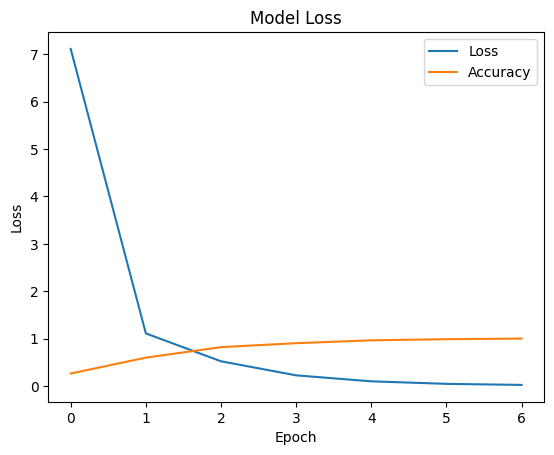

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

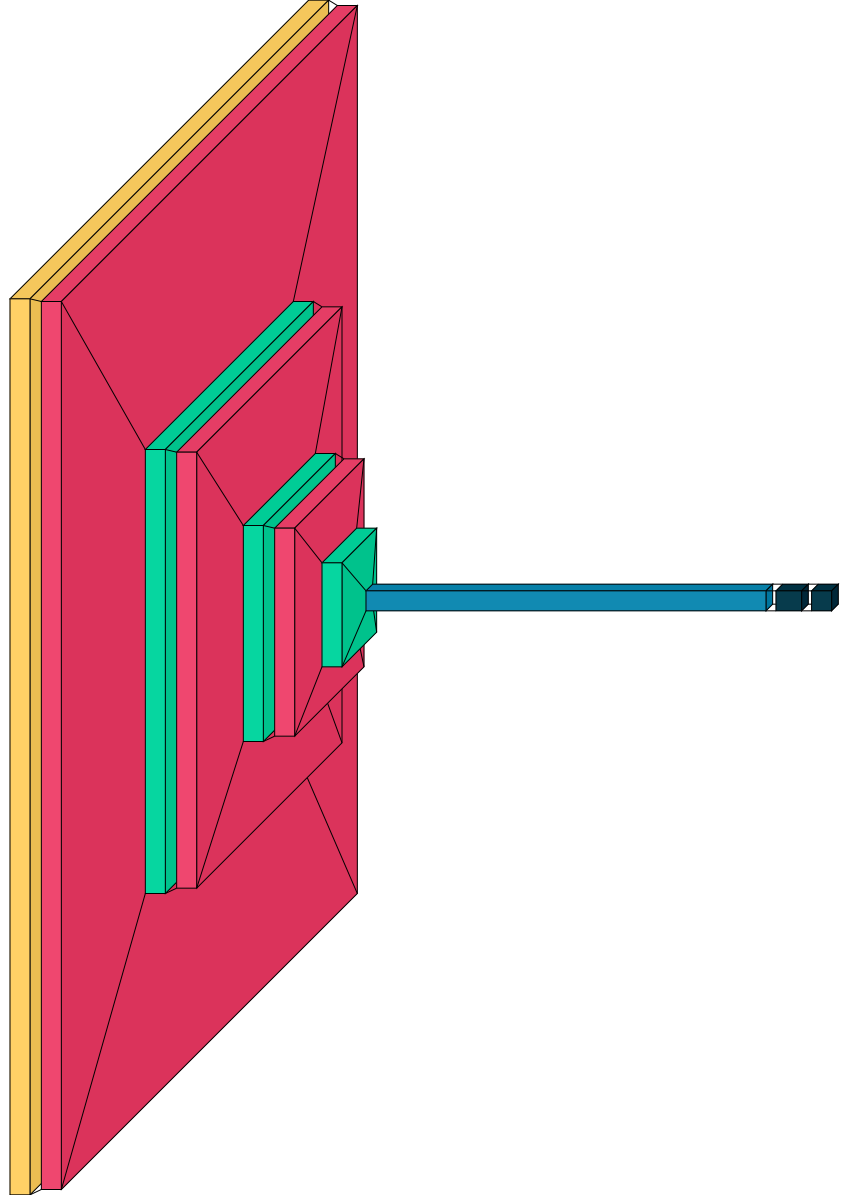

In [ ]:
visualkeras.layered_view(myCNN7_1)

1/1 [==============================] - 0s 298ms/step
Predicted Class Label: glioma


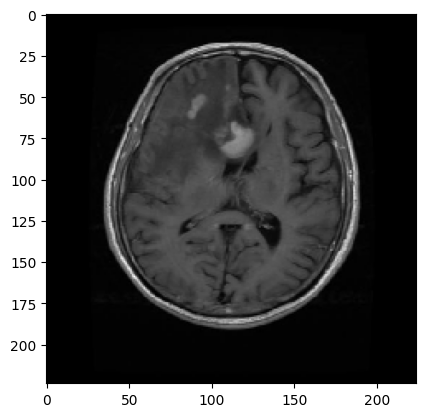

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_path = '/content/gg.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = myCNN7_1.predict(img_array)

predicted_class = np.argmax(predictions)

class_labels = {0: 'glioma', 1: 'meningioma', 2: 'no', 3: 'pituitary'}
predicted_label = class_labels[predicted_class]

plt.imshow(img)
print("Predicted Class Label:", predicted_label)
